# SEE THE WORLD THROUGH AI

## Setup & Image Detection
 Goal: Set up YOLO and detect objects in a single image.
- Install and import YOLO (Ultralytics YOLOv8)
- Load pretrained model
- Run inference on an image
- Display results

In [1]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.6 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
uploaded = files.upload()
for filename in uploaded.keys():
  image_path = filename
  print(f'User uploaded file "{filename}"')

Saving sample.jpg to sample.jpg
User uploaded file "sample.jpg"


In [4]:
model = YOLO('yolov8n.pt')

In [5]:
results = model(image_path)
annotated = results[0].plot()


image 1/1 /content/sample.jpg: 576x640 1 bicycle, 1 car, 1 truck, 1 dog, 42.5ms
Speed: 13.3ms preprocess, 42.5ms inference, 315.2ms postprocess per image at shape (1, 3, 576, 640)


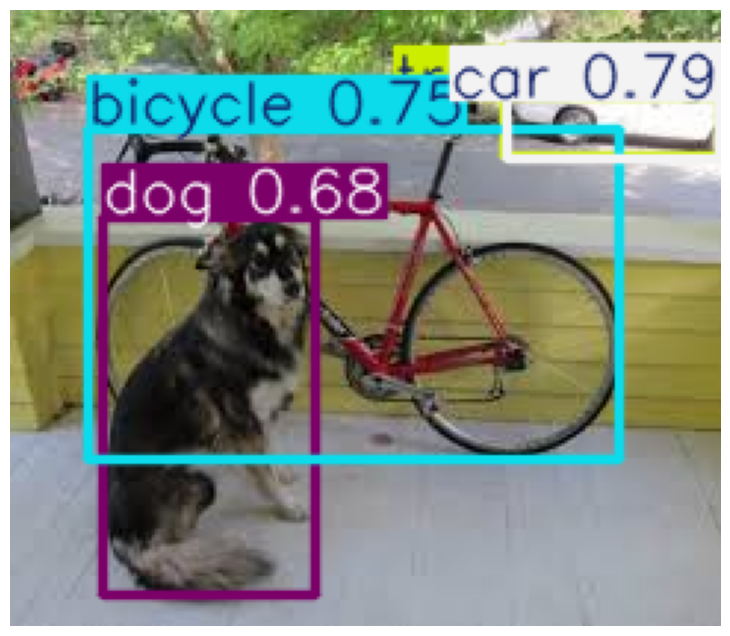

In [6]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# OBJECT DETECTION ON VIDEO
Goal: Use YOLO to detect objects in video frame.
- Load and process video file frame-by-frame
- Save output video with bounding boxes

In [7]:
!pip install ultralytics

In [8]:
from google.colab import files

uploaded = files.upload()
video_path=list(uploaded.keys())[0]
print("uploaded:",video_path)

Saving fast motion cars moving on highway.mp4 to fast motion cars moving on highway.mp4
uploaded: fast motion cars moving on highway.mp4


In [9]:
import cv2
from google.colab import files
from ultralytics import YOLO

# Install ultralytics if you haven't already
# !pip install ultralytics

# Define the path to your video file
video_path = "/content/fast motion cars moving on highway.mp4"

# Load the pre-trained YOLO model
model = YOLO("yolov8n.pt")

output_path = "output_detected.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video. Please make sure the file exists at the specified path.")
    exit()

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)) or 25.0
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection on the frame
    results = model(frame)

    # Draw bounding boxes and labels on the frame
    annotated_frame = results[0].plot()

    # Write the annotated frame to the output video file
    out.write(annotated_frame)

    frame_count += 1
    if frame_count % 50 == 0:
        print(f"Processed {frame_count} frames")

cap.release()
out.release()

print("Video saved:", output_path)
files.download(output_path)


0: 384x640 30 cars, 79.3ms
Speed: 1.9ms preprocess, 79.3ms inference, 14.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 35 cars, 7.0ms
Speed: 2.3ms preprocess, 7.0ms inference, 14.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 34 cars, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 22.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 33 cars, 7.0ms
Speed: 1.9ms preprocess, 7.0ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 32 cars, 1 traffic light, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 33 cars, 7.4ms
Speed: 1.9ms preprocess, 7.4ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 31 cars, 6.8ms
Speed: 1.8ms preprocess, 6.8ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 34 cars, 6.9ms
Speed: 2.4ms preprocess, 6.9ms inference, 14.7ms postprocess per image at shape (1, 3,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Fine-tuning and Evaluation

Goal: Fine-tune the YOLOv8 model on a public dataset and evaluate its performance using mAP metrics.

- Train the model on the COCO8 dataset.
- Evaluate the model on the validation set.
- Analyze the mAP metrics to understand performance.


In [10]:
# Import the YOLO class from the ultralytics library
from ultralytics import YOLO

# Load the pre-trained 'yolov8n.pt' model
model = YOLO('yolov8n.pt')

# Fine-tune the model on the COCO8 dataset
# The `data='coco8.yaml'` argument automatically downloads the dataset.
# `epochs=100` is the number of times the model will go through the dataset.
# `imgsz=640` sets the image size for training.
results = model.train(data='coco8.yaml', epochs=100, imgsz=640)

Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

In [11]:
# The model object from the training step already holds the trained model.
# You can also load it explicitly if needed.
# model = YOLO('runs/detect/train/weights/best.pt')

# Run the validation mode on the same dataset
results = model.val()

Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1423.2±653.9 MB/s, size: 54.0 KB)
val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4/4 4.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 3.1it/s 0.3s
                   all          4         17       0.62      0.871      0.888      0.622
                person          3         10      0.676        0.5      0.517      0.282
                   dog          1          1      0.359          1      0.995      0.597
                 horse          1          2       0.75          1      0.995      0.631
              elephant          1          2      0.576      0.728      0.828      0.332
              umbrella          1          1      0.5

# Optimize and Export for Production Deployment

Goal: Prepare the fine-tuned model for deployment by optimizing and exporting it to a production format.

- Export the trained model to a common format like ONNX.
- Export and quantize the model to TFLite for mobile or edge devices.

In [12]:
# Load the best-performing model from your training session
model = YOLO('runs/detect/train/weights/best.pt')

# Export the model to ONNX format
model.export(format='onnx')

Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.67', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 8.6s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.0 opset 19...
ONNX: slimming with onnxslim 0.1.68...
ONNX: export success ✅ 10.2s, saved as 'runs/detect/train/weights/best.onnx' (12.2 MB)

Export complete (10.7s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=de

'runs/detect/train/weights/best.onnx'

In [14]:
# Load the best-performing model from your training session
model = YOLO('runs/detect/train/weights/best.pt')

# Export the model to ONNX format
model.export(format='onnx')

# Export and quantize the model to TFLite using the 'int8' argument
model.export(format='tflite', int8=True)

Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.19.0 opset 19...
ONNX: slimming with onnxslim 0.1.68...
ONNX: export success ✅ 0.9s, saved as 'runs/detect/train/weights/best.onnx' (12.2 MB)

Export complete (1.9s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/datasets/coco8.yaml  
Visualize:       https://netron.app
Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
WARNING ⚠️ INT8 export requires a missing 'data'

'runs/detect/train/weights/best_saved_model/best_int8.tflite'

# Build and Showcase a Detection App

Goal: Create a simple, interactive application to demonstrate the object detection model.
- Use Gradio to build a web-based user interface.
- Integrate the trained model into the app.
- Allow users to upload an image and get real-time object detection results.

In [15]:
!pip install -q gradio

In [16]:
import gradio as gr
from ultralytics import YOLO
import numpy as np
import cv2
from PIL import Image

# Load your trained model
# The path 'runs/detect/train/weights/best.pt' is where Colab saved your trained model.
model = YOLO('runs/detect/train/weights/best.pt')

def detect_objects(image_path):
    """
    Performs object detection on an image using the YOLOv8 model.
    """
    # Perform inference on the image
    results = model(image_path)

    # Get the annotated image with bounding boxes
    annotated_img = results[0].plot()

    # Convert the annotated image from BGR (OpenCV) to RGB for Gradio
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    return Image.fromarray(annotated_img)

# Create the Gradio interface
iface = gr.Interface(
    fn=detect_objects,
    inputs=gr.Image(type="pil", label="Upload an Image"),
    outputs=gr.Image(type="pil", label="Detection Results"),
    title="Object Detection with YOLOv8",
    description="Upload an image to see object detection results from the trained YOLOv8 model."
)

# Launch the app
if __name__ == "__main__":
    iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://73a3d6d2fa661cadce.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
